In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Guardar el nombre del archivo en una variable
nombre_archivo = "log_central.csv"

# Leer el archivo CSV
df = pd.read_csv(nombre_archivo)

# Mostrar las primeras filas del DataFrame
print(df.head())

             timestamp tipo_evento juego_id        accion   equipo jugador  \
0  2025-06-08T14:00:00         ini   juego1  inicio-juego      NaN     NaN   
1  2025-06-08T14:00:02         ini   juego1  crea-jugador  equipo1  pepito   
2  2025-06-08T14:00:02         fin   juego1  crea-jugador  equipo1  pepito   
3  2025-06-08T14:00:03         ini   juego1  crea-jugador  equipo1    luis   
4  2025-06-08T14:00:04         fin   juego1  crea-jugador  equipo1    luis   

   resultado  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


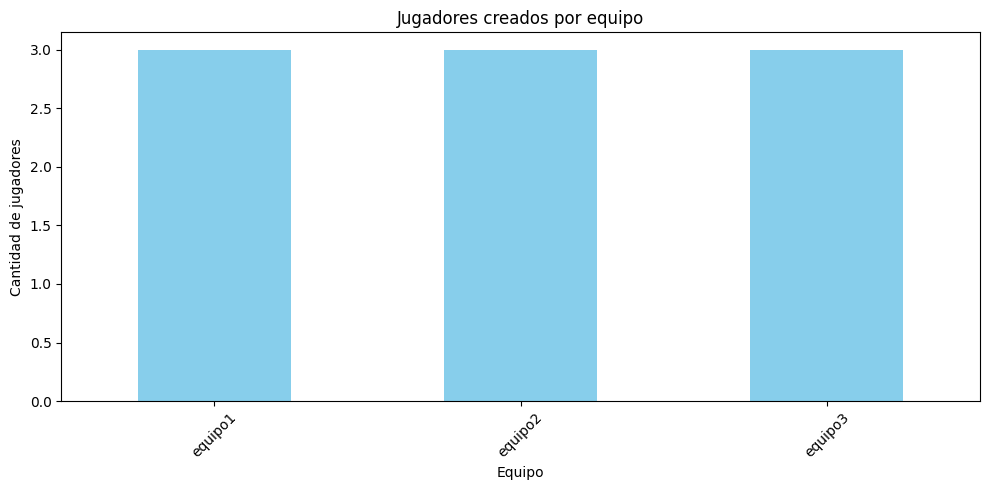

In [47]:
# Filtrar solo los eventos de 'crea-jugador' y tipo_evento 'fin'
jugadores_creados = df[(df['accion'] == 'crea-jugador') & (df['tipo_evento'] == 'fin')]

# Contar cuántos jugadores ha creado cada equipo
conteo_equipos = jugadores_creados['equipo'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
conteo_equipos.plot(kind='bar', color='skyblue')
plt.title("Jugadores creados por equipo")
plt.xlabel("Equipo")
plt.ylabel("Cantidad de jugadores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


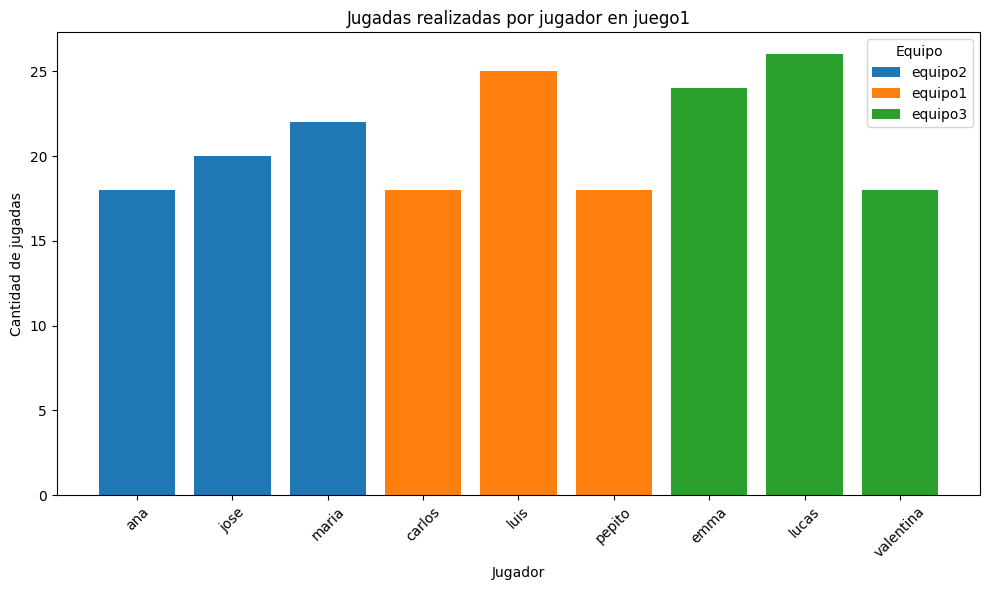

In [48]:
# Filtrar datos solo del juego1
juego1_data = df[df['juego_id'] == 'juego1']

# Filtrar solo las filas que tienen jugador (acciones de jugadores)
acciones_jugadores = juego1_data[juego1_data['jugador'].notna() & (df['tipo_evento'] == 'fin')]

# Contar jugadas realizadas por jugador y equipo
jugadas_por_jugador = acciones_jugadores.groupby(['jugador', 'equipo']).size().reset_index(name='cantidad')

# Crear gráfico de barras con colores diferentes por equipo
plt.figure(figsize=(10, 6))
for equipo in jugadas_por_jugador['equipo'].unique():
    subset = jugadas_por_jugador[jugadas_por_jugador['equipo'] == equipo]
    plt.bar(subset['jugador'], subset['cantidad'], label=equipo)

plt.title("Jugadas realizadas por jugador en juego1")
plt.xlabel("Jugador")
plt.ylabel("Cantidad de jugadas")
plt.xticks(rotation=45)
plt.legend(title="Equipo")
plt.tight_layout()
plt.show()


/tmp/ipykernel_11250/1831810001.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lanza['lanzamiento'] = df_lanza.groupby('equipo').cumcount() + 1


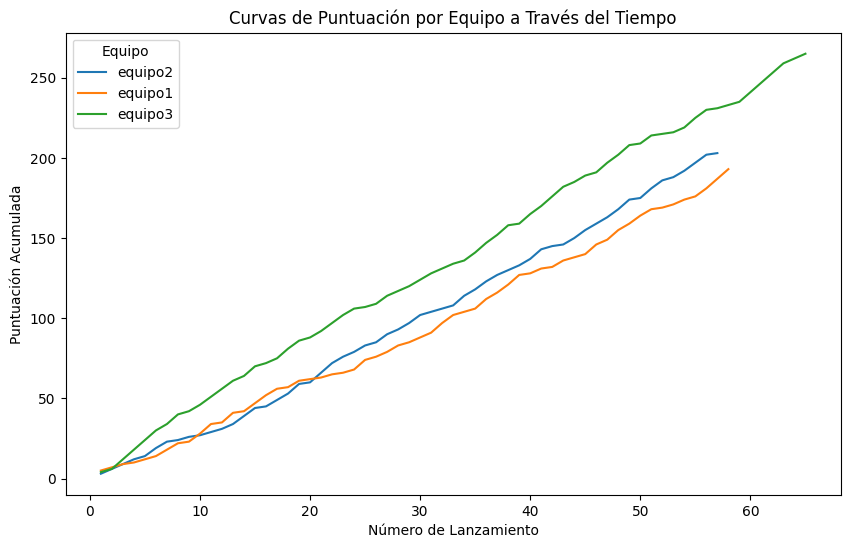

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
nombre_archivo = "log_central.csv"
df = pd.read_csv(nombre_archivo)

# Filtrar solo los eventos 'fin' y donde la acción es 'lanza-dado'
df_lanza = df[(df['tipo_evento'] == 'fin') & (df['accion'] == 'lanza-dado')]

# Crear una nueva columna para el número de lanzamiento
df_lanza['lanzamiento'] = df_lanza.groupby('equipo').cumcount() + 1

# Inicializar un diccionario para las puntuaciones acumuladas por equipo
puntuaciones_acumuladas = {}

# Iterar sobre las filas de eventos 'fin' para 'lanza-dado'
for index, row in df_lanza.iterrows():
    equipo = row['equipo']
    puntos = int(row['resultado'])  # Convertir el resultado a un número de puntos

    # Si el equipo no está en el diccionario, inicializarlo
    if equipo not in puntuaciones_acumuladas:
        puntuaciones_acumuladas[equipo] = []

    # Agregar la puntuación acumulada para el equipo en ese lanzamiento
    if puntuaciones_acumuladas[equipo]:
        puntuaciones_acumuladas[equipo].append(puntuaciones_acumuladas[equipo][-1] + puntos)
    else:
        puntuaciones_acumuladas[equipo].append(puntos)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar las puntuaciones acumuladas por cada equipo
for equipo, puntuaciones in puntuaciones_acumuladas.items():
    plt.plot(range(1, len(puntuaciones) + 1), puntuaciones, label=equipo)

# Etiquetas y título del gráfico
plt.xlabel('Número de Lanzamiento')
plt.ylabel('Puntuación Acumulada')
plt.title('Curvas de Puntuación por Equipo a Través del Tiempo')
plt.legend(title='Equipo')

# Mostrar el gráfico
plt.show()


/tmp/ipykernel_11250/1464766224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_creacion['timestamp'] = pd.to_datetime(df_creacion['timestamp'])
/tmp/ipykernel_11250/1464766224.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_creacion['segundos_transcurridos'] = (df_creacion['timestamp'] - start_time).dt.total_seconds()
/tmp/ipykernel_11250/1464766224.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

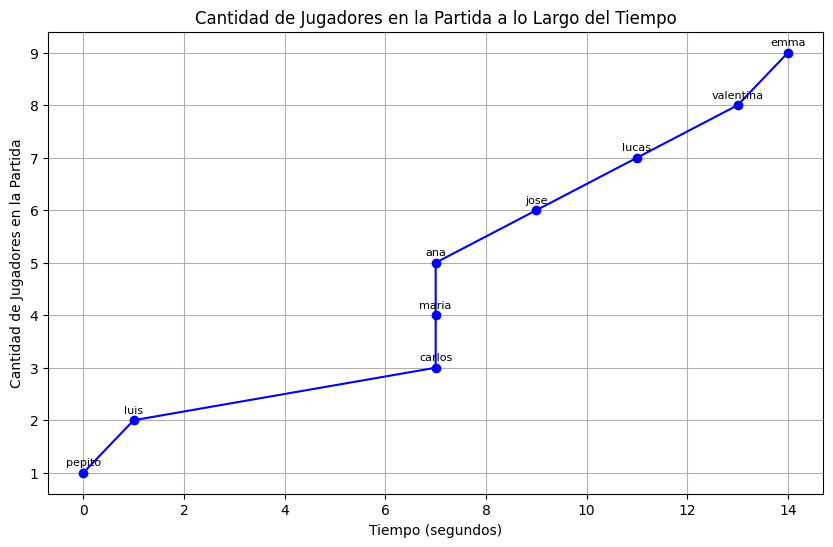

,timestamp,tipo_evento,juego_id,accion,equipo,jugador,resultado,segundos_transcurridos,jugadores_en_partida
1,2025-06-08 14:00:02,ini,juego1,crea-jugador,equipo1,pepito,NaN,0.0,1
3,2025-06-08 14:00:03,ini,juego1,crea-jugador,equipo1,luis,NaN,1.0,2
5,2025-06-08 14:00:09,ini,juego1,crea-jugador,equipo1,carlos,NaN,7.0,3
7,2025-06-08 14:00:09,ini,juego1,crea-jugador,equipo2,maria,NaN,7.0,4
9,2025-06-08 14:00:09,ini,juego1,crea-jugador,equipo2,ana,NaN,7.0,5
11,2025-06-08 14:00:11,ini,juego1,crea-jugador,equipo2,jose,NaN,9.0,6
13,2025-06-08 14:00:13,ini,juego1,crea-jugador,equipo3,lucas,NaN,11.0,7
15,2025-06-08 14:00:15,ini,juego1,crea-jugador,equipo3,valentina,NaN,13.0,8
17,2025-06-08 14:00:16,ini,juego1,crea-jugador,equipo3,emma,NaN,14.0,9


In [64]:
# Filtrar solo los eventos de creación de equipos
df_creacion = df[(df['tipo_evento'] == 'ini') & (df['accion'] == 'crea-jugador')]

# Convertir la columna timestamp a formato datetime
df_creacion['timestamp'] = pd.to_datetime(df_creacion['timestamp'])

# Obtener el primer y último timestamp
start_time = df_creacion['timestamp'].min()
end_time = df_creacion['timestamp'].max()

# Calcular el tamaño de la ventana de tiempo (en segundos)
ventana_tiempo = (end_time - start_time).total_seconds() / 5  # Dividir entre 5 ventanas

# Calcular el número de ventanas de tiempo
total_segundos = (end_time - start_time).total_seconds()
num_ventanas = 5  # Fijar el número de ventanas en 5

# Crear una nueva columna con los segundos transcurridos desde el primer timestamp
df_creacion['segundos_transcurridos'] = (df_creacion['timestamp'] - start_time).dt.total_seconds()

# Contamos el número acumulado de jugadores a lo largo del tiempo
df_creacion['jugadores_en_partida'] = range(1, len(df_creacion) + 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_creacion['segundos_transcurridos'], df_creacion['jugadores_en_partida'], marker='o', linestyle='-', color='b')

# Añadir nombres de los jugadores sobre cada punto
for i, row in df_creacion.iterrows():
    plt.text(row['segundos_transcurridos'], row['jugadores_en_partida'] + 0.1, row['jugador'], ha='center', va='bottom', fontsize=8)

# Etiquetas y título del gráfico
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Cantidad de Jugadores en la Partida')
plt.title('Cantidad de Jugadores en la Partida a lo Largo del Tiempo')
plt.grid(True)

# Mostrar el gráfico
plt.show()

df_creacion




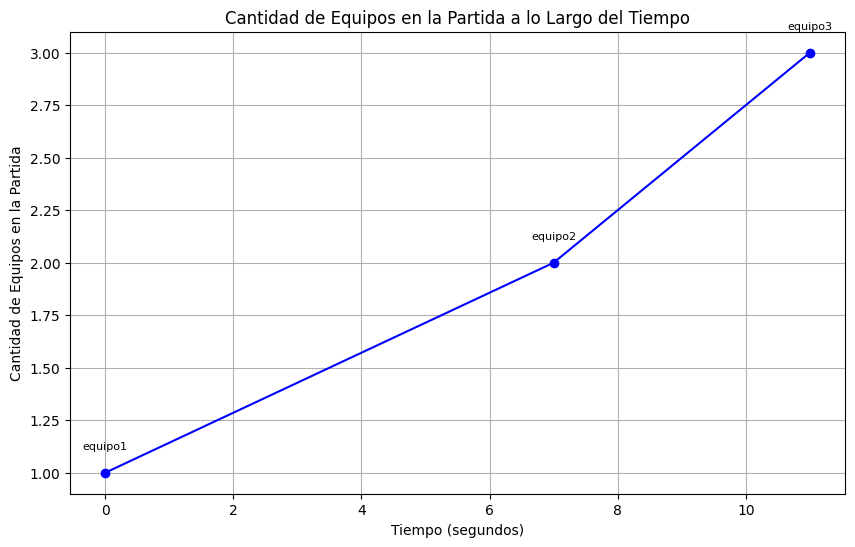

<Figure size 640x480 with 0 Axes>

In [ ]:
# Filtrar solo el primer jugador de cada equipo
df_primer_jugador = df_creacion.groupby('equipo').first().reset_index()

# Ordenar el DataFrame por el timestamp
df_primer_jugador = df_primer_jugador.sort_values(by='timestamp')

# Crear la columna 'equipos_en_partido' que aumenta conforme se unen los equipos
df_primer_jugador['equipos_en_partida'] = range(1, len(df_primer_jugador) + 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_primer_jugador['segundos_transcurridos'], df_primer_jugador['equipos_en_partida'], marker='o', linestyle='-', color='b')

# Añadir nombres de los equipos sobre cada punto
for i, row in df_primer_jugador.iterrows():
    plt.text(row['segundos_transcurridos'], row['equipos_en_partida'] + 0.1, row['equipo'], ha='center', va='bottom', fontsize=8)

# Etiquetas y título del gráfico
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Cantidad de Equipos en la Partida')
plt.title('Cantidad de Equipos en la Partida a lo Largo del Tiempo')
plt.grid(True)

plt.savefig('grafico_equipos.png')  # Puedes cambiar el nombre y formato del archivo aquí

# Mostrar el gráfico
plt.show()

